In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [5]:
training=train_datagen.flow_from_directory('/content/drive/MyDrive/nhandientiengiay/train',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 552 images belonging to 11 classes.


In [6]:
test=train_datagen.flow_from_directory('/content/drive/MyDrive/nhandientiengiay/test',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 55 images belonging to 11 classes.


In [7]:
model=Sequential() 
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                    

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(training,batch_size=32,epochs=100,verbose=1,validation_data=test,callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
28/28 [==============================] - 15s 523ms/step - loss: 0.4716 - accuracy: 0.9275 - val_loss: 4.3251 - val_accuracy: 0.6000
Epoch 2/100
28/28 [==============================] - 15s 543ms/step - loss: 0.0572 - accuracy: 0.9928 - val_loss: 3.1170 - val_accuracy: 0.6000
Epoch 3/100
28/28 [==============================] - 14s 506ms/step - loss: 0.1379 - accuracy: 0.9656 - val_loss: 4.2440 - val_accuracy: 0.6364
Epoch 4/100
28/28 [==============================] - 15s 546ms/step - loss: 0.0538 - accuracy: 0.9873 - val_loss: 6.6274 - val_accuracy: 0.5273
Epoch 5/100
28/28 [==============================] - 17s 610ms/step - loss: 0.1179 - accuracy: 0.9728 - val_loss: 5.7142 - val_accuracy: 0.4000
Epoch 6/100
28/28 [==============================] - 14s 514ms/step - loss: 0.1488 - accuracy: 0.9692 - val_loss: 3.8091 - val_accuracy: 0.6364
Epoch 7/100
28/28 [==============================] - 14s 503ms/step - loss: 0.1127 - accuracy: 0.9855 - val_loss: 7.2552 - val_accuracy:

In [12]:
Score=model.evaluate(training,verbose=0)
print('Test Loss', Score[0])
print('Test Accuracy', Score[1])

Test Loss 1.2043254375457764
Test Accuracy 0.8768116235733032


<function matplotlib.pyplot.show>

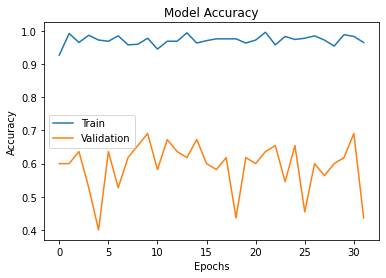

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [14]:
model.save('nhandientiengiay.h5')

In [15]:
model_nhandien=load_model('nhandientiengiay.h5')

In [16]:
training.class_indices

{'1000': 0,
 '100k': 1,
 '10k': 2,
 '200': 3,
 '2000': 4,
 '200k': 5,
 '20k': 6,
 '500': 7,
 '5000': 8,
 '500k': 9,
 '50k': 10}

200 dong


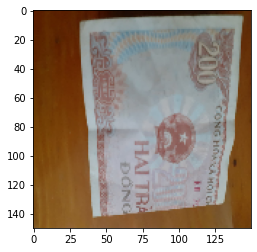

In [28]:
classes=['1 nghin dong','100 nghin dong','10 nghin dong','200 dong','2 nghin dong ','200 nghin dong','20 nghin dong','500 dong','5 nghin dong','5 tram nghin dong','50 nghin dong']
img=load_img('/content/drive/MyDrive/nhandientiengiay/test/200/2f7b4e4fd6f717a94ee6189.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
print(classes[np.argmax(model.predict(img))])

5 tram nghin dong


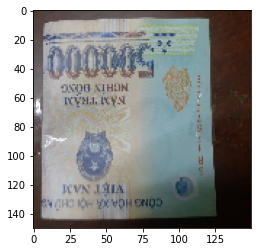

In [24]:
classes=['1 nghin dong','100 nghin dong','10 nghin dong','200 dong','2 nghin dong ','2 nghin dong','20 nghin dong','500 dong','5 nghin dong','5 tram nghin dong','50 nghin dong']
img=load_img('/content/drive/MyDrive/nhandientiengiay/test/500k/8fbd9ddb459d85c3dc8c208.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
print(classes[np.argmax(model.predict(img))])

100 nghin dong


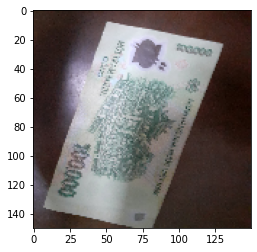

In [25]:
classes=['1 nghin dong','100 nghin dong','10 nghin dong','200 dong','2 nghin dong ','2 nghin dong','20 nghin dong','500 dong','5 nghin dong','5 tram nghin dong','50 nghin dong']
img=load_img('/content/drive/MyDrive/nhandientiengiay/test/100k/0b7d964c4f0a8f54d61b157.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
print(classes[np.argmax(model.predict(img))])

In [29]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('nhandientiengiay.ipynb')